In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('BlackFriday.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Analyzing Columns

In [9]:
df['User_ID'].nunique()

5891

In [10]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [11]:
df['Product_ID'].nunique()

3623

In [12]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


## Analyzing Gender

In [15]:
len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])

(405380, 132197)

In [16]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])

In [17]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

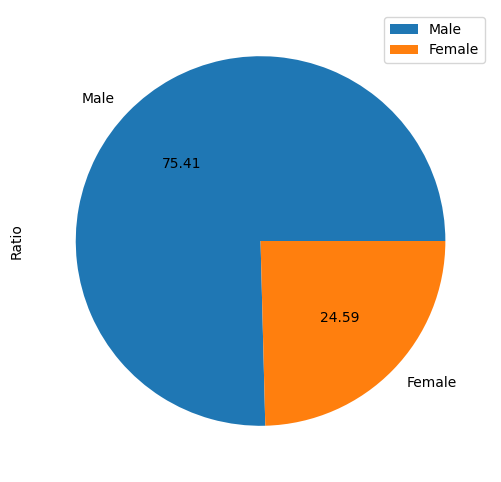

In [18]:
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = '%.2f')

#### Another Approach

In [19]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

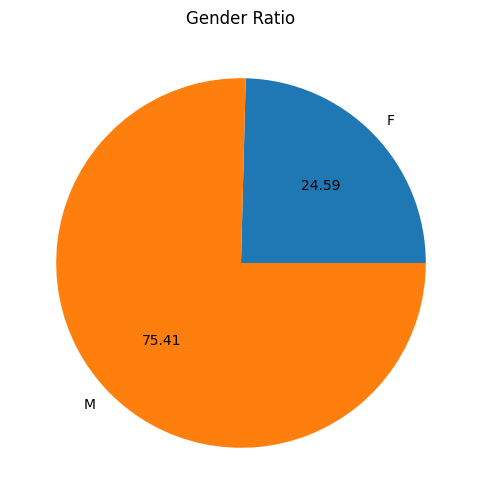

In [20]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%.2f', title = 'Gender Ratio', figsize = (6,6))

<Axes: xlabel='Gender'>

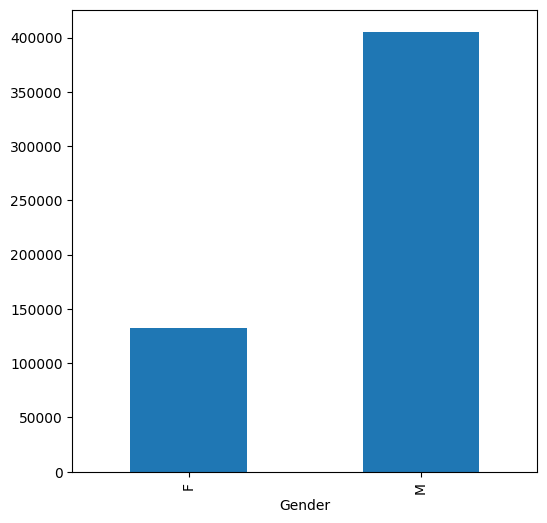

In [21]:
df.groupby('Gender').size().plot(kind = 'bar', figsize = (6,6))

In [22]:
df.groupby('Gender').sum()['Purchase']

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

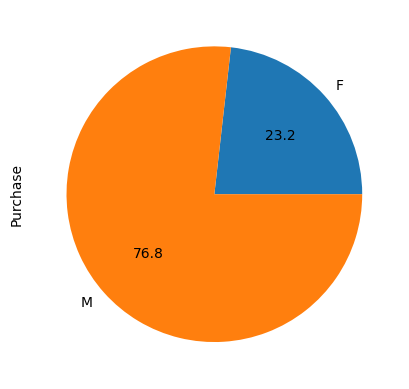

In [23]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = '%.1f')

## Analyzing Age

In [25]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

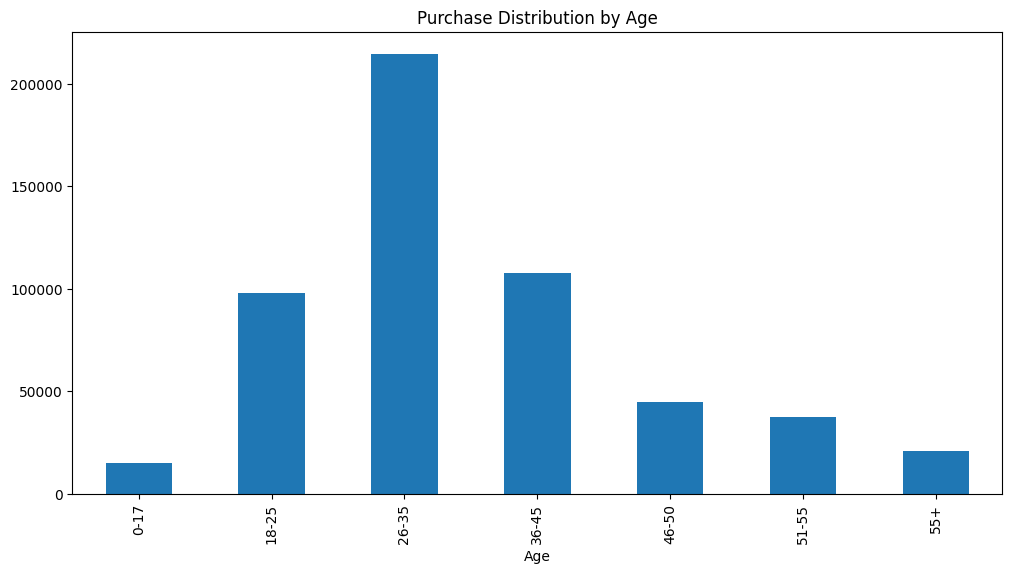

In [26]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12,6), title = 'Purchase Distribution by Age')

## Multi Column Analysis

In [27]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

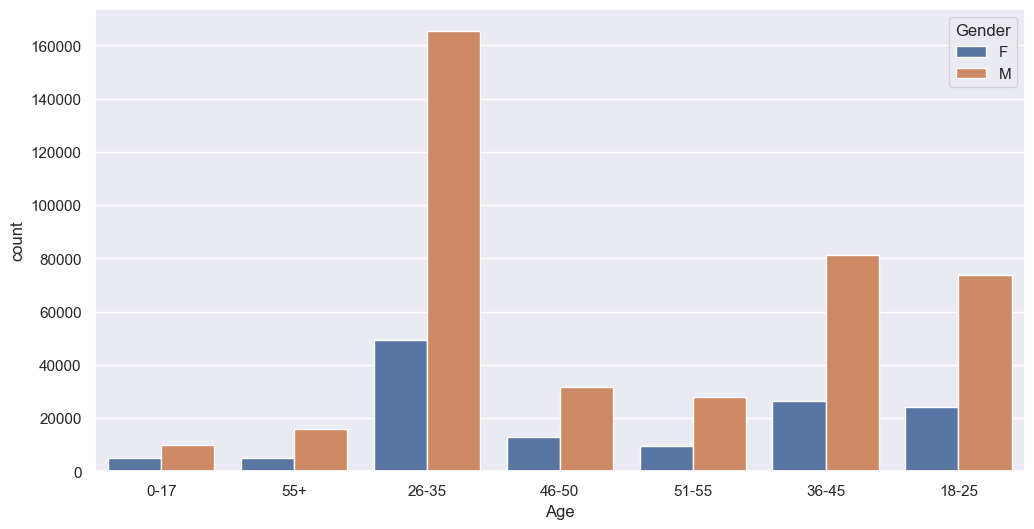

In [28]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot( x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

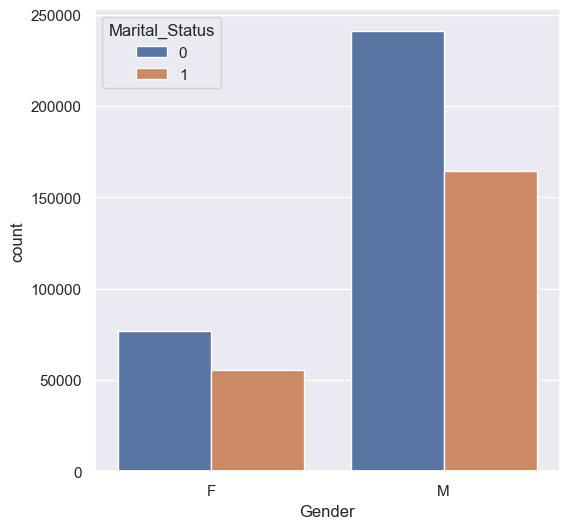

In [29]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot( x = 'Gender', hue = 'Marital_Status', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

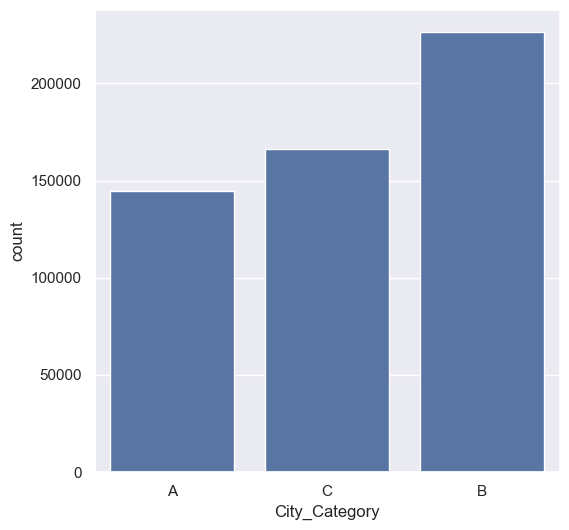

In [30]:
sns.countplot(x = df['City_Category'])

<Axes: >

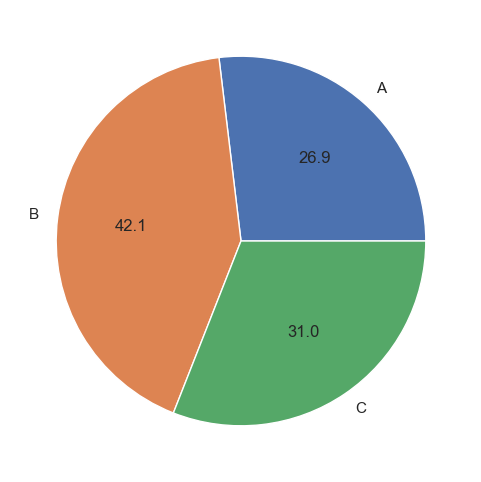

In [31]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%.1f')

## Occupation and Product Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

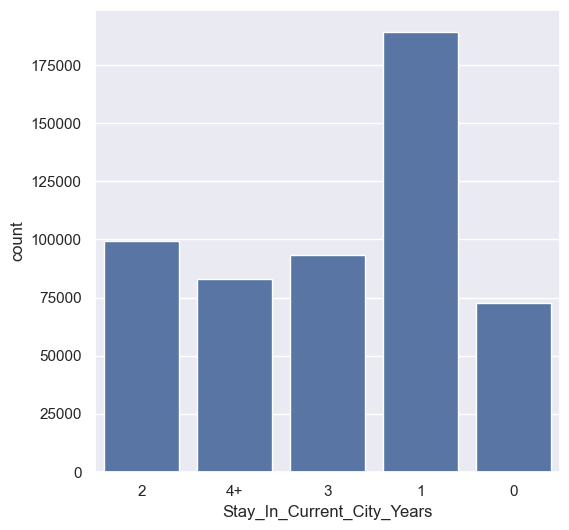

In [32]:
sns.countplot (x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

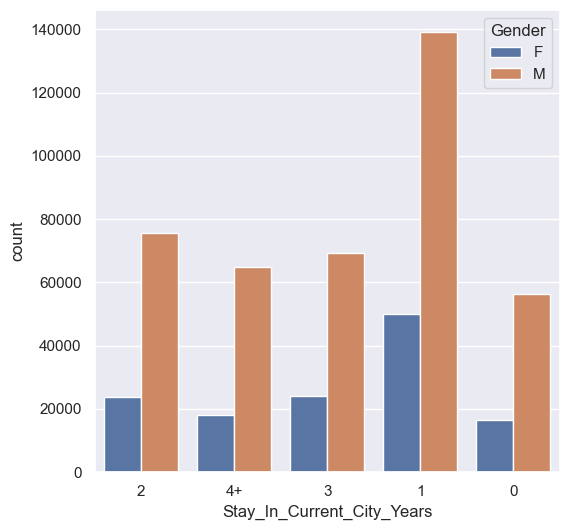

In [33]:
sns.countplot (x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)
# Therefore Target for males with 1 year of EXP

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

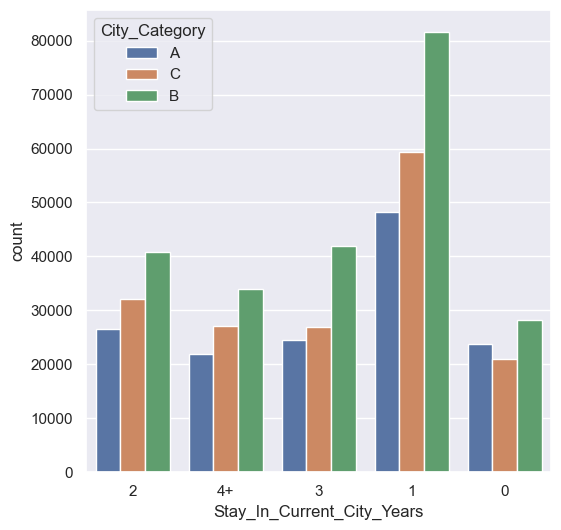

In [35]:
sns.countplot (x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)
# Therefore target more in city B

<Axes: xlabel='Stay_In_Current_City_Years'>

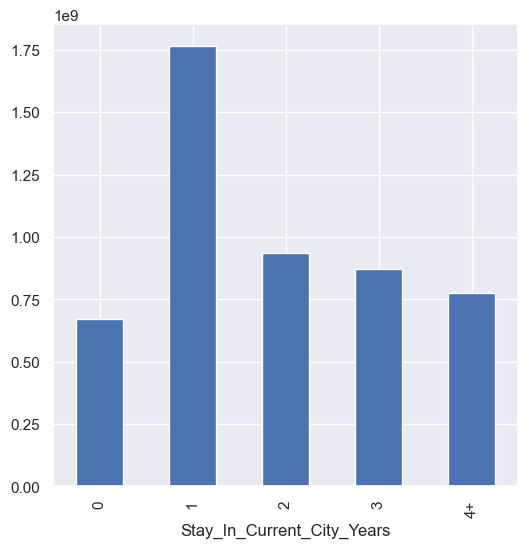

In [36]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

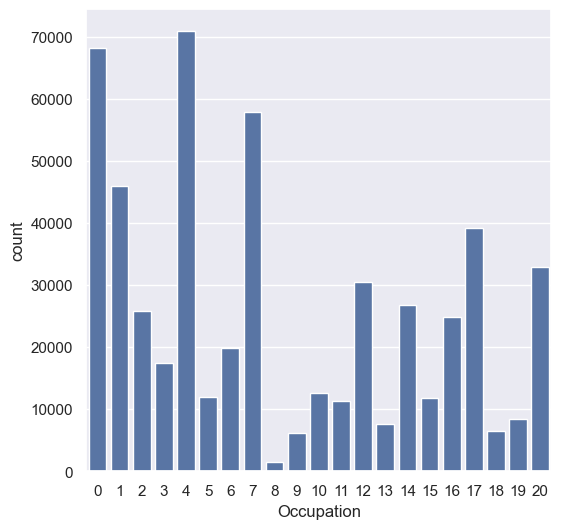

In [37]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

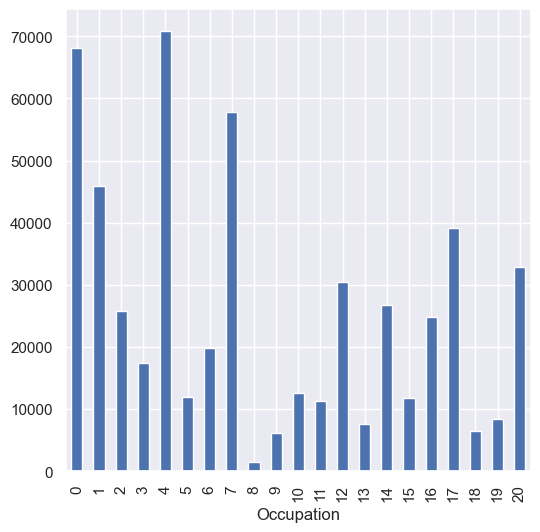

In [38]:
df.groupby('Occupation').size().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

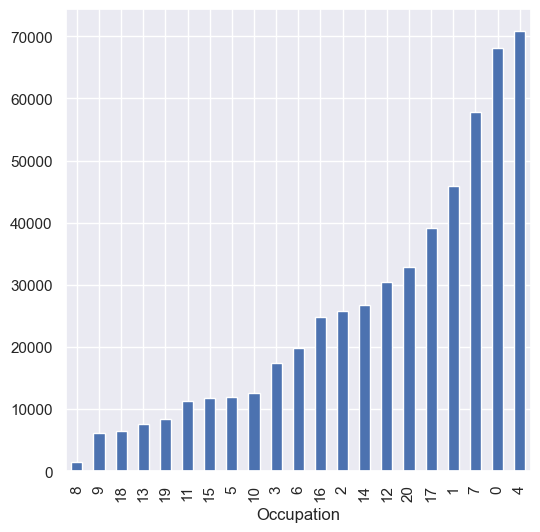

In [39]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

In [40]:
df.groupby('Product_Category_1').size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

<Axes: xlabel='Product_Category_1'>

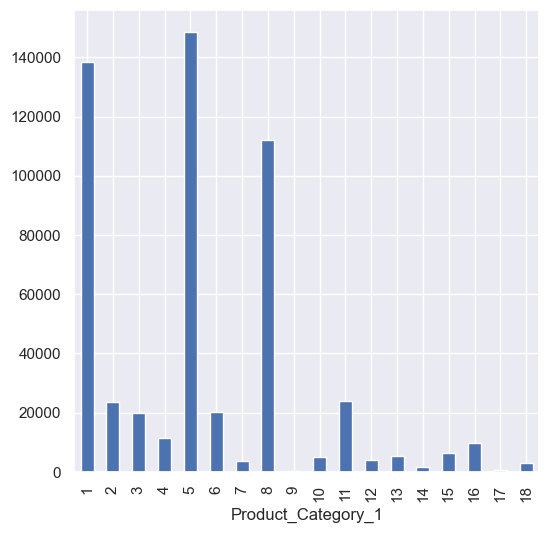

In [41]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

## Combining Age and Marital Status

In [44]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] + "_"+str(df['Marital_Status'][i]))

In [45]:
l

['F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'F_1',
 'F_1',
 'M_0',
 'M_0',
 'M_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'F_1',


In [46]:
df['MaritalGender'] = l

In [47]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

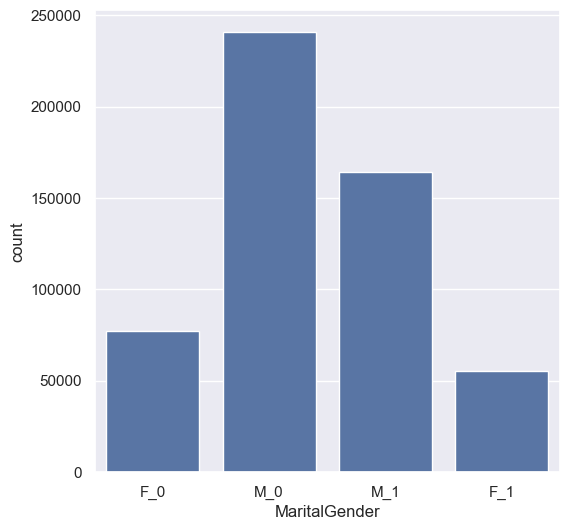

In [48]:
sns.countplot(x = df['MaritalGender'])
# Therefore can say count of purchase of men-unmarried > men-married > female-unmarried > female-married

<Axes: xlabel='Age', ylabel='count'>

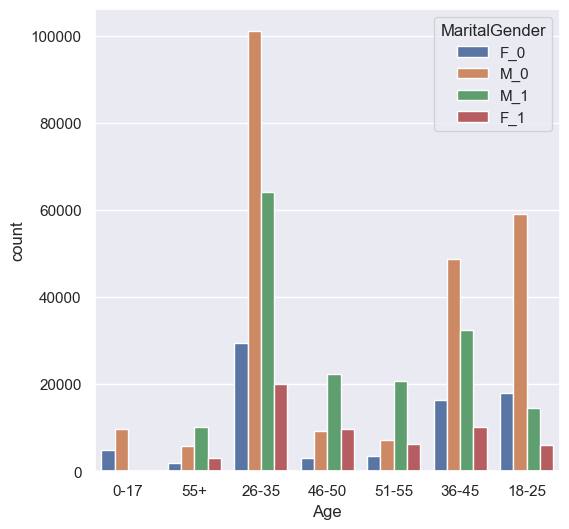

In [49]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

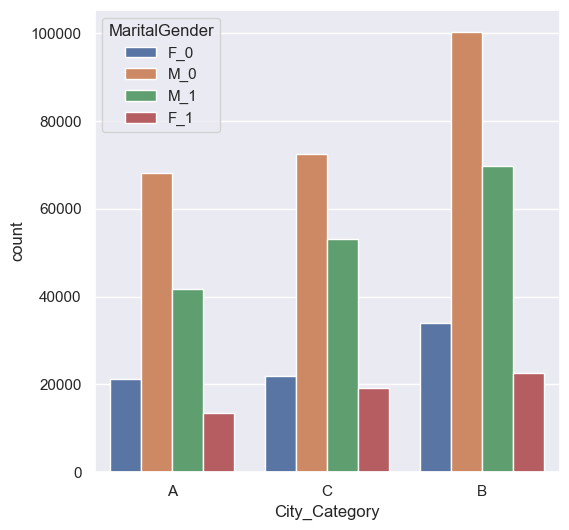

In [50]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])